# Labor 1 Sprachsignale plotten, laden und erzeugen

## Imports

In [408]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

## Erzeugen Sie eine Audio-Datei auf ihrem PC mit folgendem Inhalt: "Dies ist eine Suchmaschine".

- Verwenden Sie als Abtastrate 𝑓𝑎 = 16𝑘𝐻𝑧. 
- Erstellen Sie anschliessend ein Jupyter-Notebook das die erstellte Audio-Datei lädt, abspielt und das Sprachsignal als Funktion der Zeit plottet. 
- Können Sie im geplotteten Sprachsignal Teile ihres Satzes wieder erkennen? Analysieren Sie ihr Sprachsignal schrittweise und beschreiben Sie ihr Ergebnis textuell.

 Abtastrate:  48000


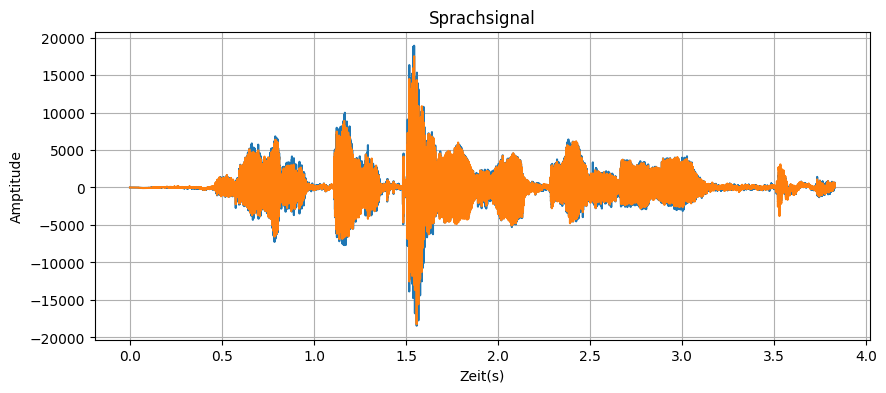

In [409]:
# Pfad zur vorhandenen Audiodatei
audio_path = 'Aufzeichnung.wav'
rate , signal = wavfile.read(audio_path)

time = np.arange(0, len(signal)) / rate 

print ( " Abtastrate: " , rate) # rate ist Falsch 

plt.figure(figsize=(10,4))
plt.plot(time,signal)
plt.xlabel("Zeit(s)")
plt.ylabel("Amptitude")
plt.title("Sprachsignal")
plt.grid(True)
plt.show()


# Audio-Datei einlesen und abspielen
ipd.Audio(audio_path)

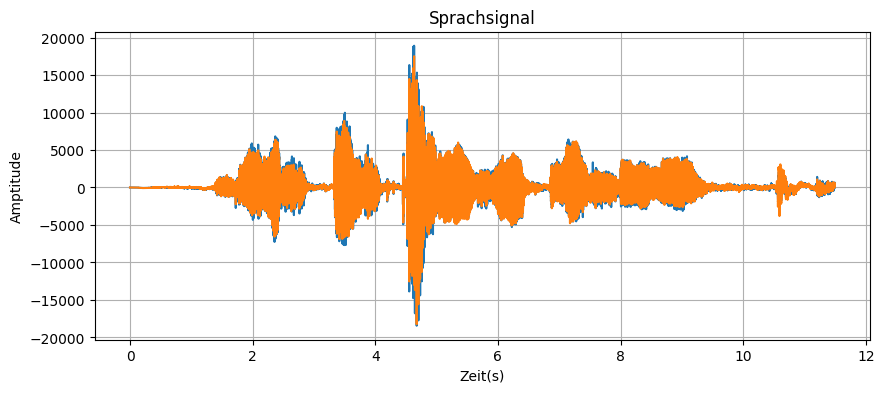

In [410]:

# Speichern der neu abgetasteten Audiodatei
wavfile.write('diesIstEineSuchmaschine.wav' , 16000 , signal ) # Rate = 16000


rate , signal = wavfile.read('diesIstEineSuchmaschine.wav')
time = np.arange(0, len(signal)) / rate 

plt.figure(figsize=(10,4))
plt.plot(time,signal)
plt.xlabel("Zeit(s)")
plt.ylabel("Amptitude")
plt.title("Sprachsignal")
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('diesIstEineSuchmaschine.wav')

## Generieren Sie jetzt ein harmonisches Signal bestehend aus dem Kammerton (𝑓0=440Hz) und seiner 2. und 3. Harmonischen. 

- Die Amplitude A und die Zeitdauer 𝑡𝑑 seien gegeben durch:  A= 1.0 und  𝑡𝑑=1s. 
- Tasten Sie das erstellte Signal mit einer Abtastfrequenz fa = 20 ∗ f0 ab und speichern Sie es in einer wave-Audiodatei ab. 
- Plotten Sie das resultierende Oszillogramm und den Kammerton. 
- Lesen Sie die Audio-Datei ein und geben Sie den Klang aus. 

In [411]:
# Parameter
a = 1.0  # Amplitude
td = 1.0  # Zeitdauer in Sekunden
f0 = 440  # Grundfrequenz in Hz
fa = 20 * f0  # Abtastfrequenz in Hz

# Zeitvektor
t = np.linspace(0, td, int(td * fa), endpoint=False)

# Zeitvektor für die Aufnahme
t_recording = np.linspace(0, td, int(td * fa), endpoint=False)


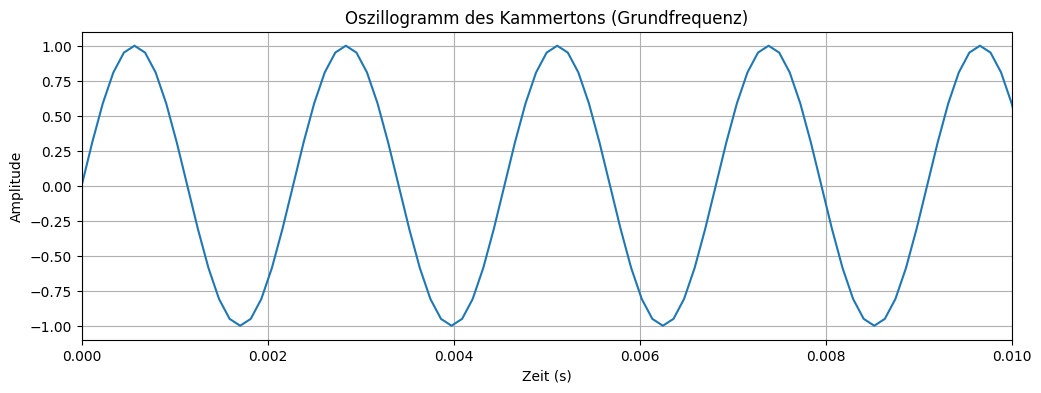

In [412]:
# Generierung des Kammertons
kammerton = a * np.sin(2 * np.pi * f0 * t)

# Speichern des Signals in einer Wave-Datei
wavfile.write('kammernton.wav', fa, np.int16(kammerton * 32767))

# Plot des Kammertons (nur die Grundfrequenz)
plt.figure(figsize=(12, 4))
plt.plot(t_recording, kammerton)
plt.xlim(0,0.01)
plt.title('Oszillogramm des Kammertons (Grundfrequenz)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('kammernton.wav')

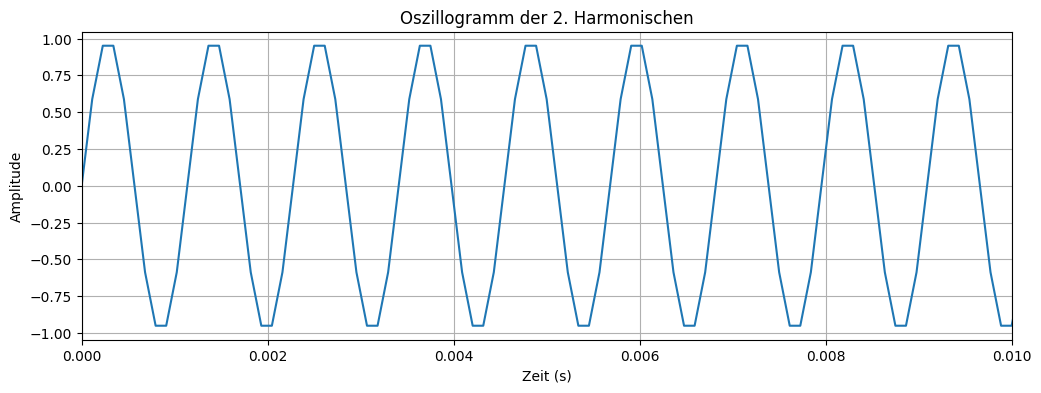

In [413]:
# Generierung der 2. Harmonischen
second_harmonic = a * np.sin(2 * np.pi * 2 * f0 * t)

# Speichern des Signals in einer Wave-Datei
wavfile.write('2.harmonische.wav', fa, np.int16(second_harmonic * 32767))

# Plot der 2. Harmonischen
plt.figure(figsize=(12, 4))
plt.plot(t_recording, second_harmonic)
plt.xlim(0,0.01)
plt.title('Oszillogramm der 2. Harmonischen')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('2.harmonische.wav')

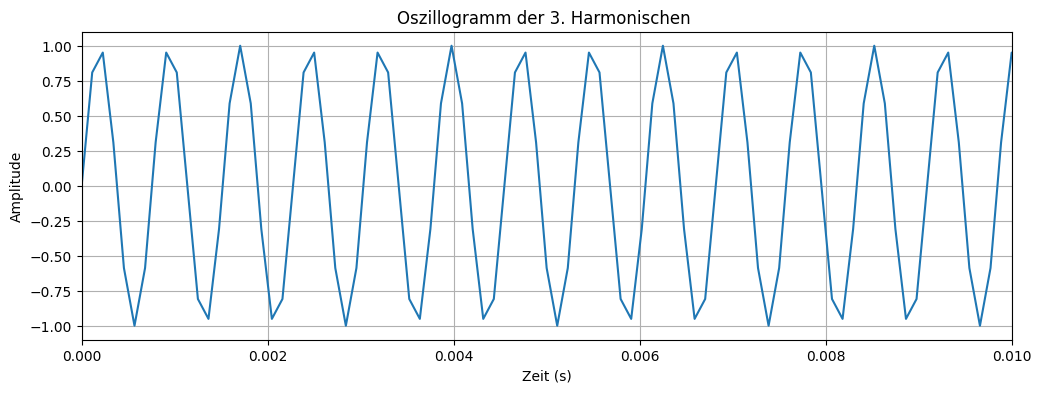

In [414]:
# Generierung der 3. Harmonischen
third_harmonic = a * np.sin(2 * np.pi * 3 * f0 * t)

# Speichern des Signals in einer Wave-Datei
wavfile.write('3.harmonische.wav', fa, np.int16(third_harmonic * 32767))

# Plot der 3. Harmonischen
plt.figure(figsize=(12, 4))
plt.plot(t_recording, third_harmonic)
plt.xlim(0,0.01)
plt.title('Oszillogramm der 3. Harmonischen ')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('3.harmonische.wav')

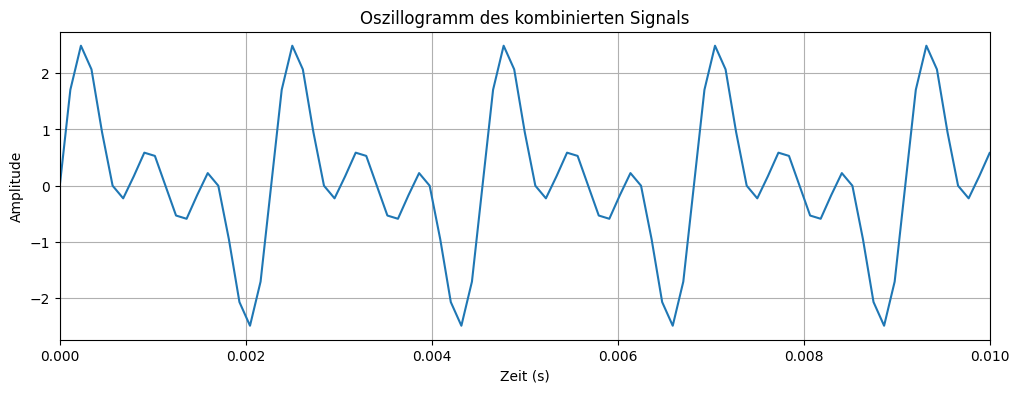

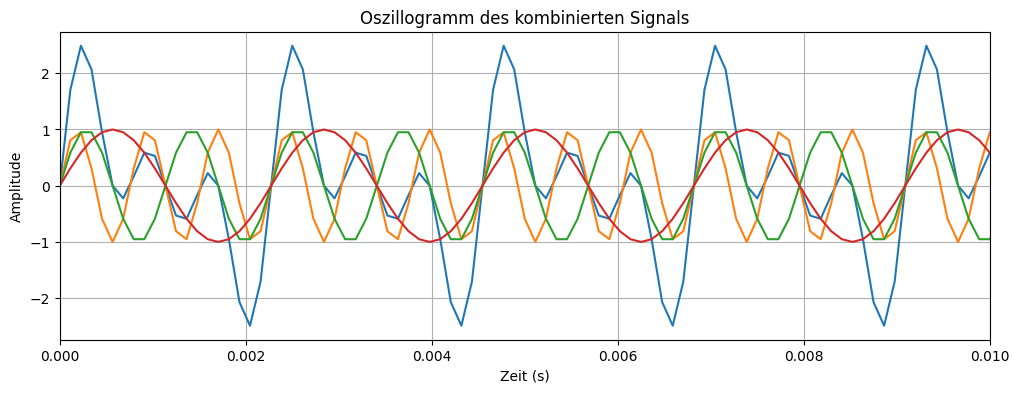

In [415]:
# Summierung der harmonischen Signale
combined_signal = kammerton + second_harmonic + third_harmonic

# Speichern des Signals in einer Wave-Datei
wavfile.write('harmonisches_signal.wav', fa, np.int16(combined_signal * 32767))

# Plot des Oszillogramms des kombinierten Signals
plt.figure(figsize=(12, 4))
plt.plot(t_recording, combined_signal)
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('harmonisches_signal.wav')

# Plot des Oszillogramms des kombinierten Signals
plt.figure(figsize=(12, 4))
plt.plot(t_recording, combined_signal)
plt.plot(t_recording, third_harmonic)
plt.plot(t_recording, second_harmonic)
plt.plot(t_recording, kammerton)
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


## Verändern Sie jetzt die Phase der drei Einzeltöne mit einer Zufallsfunktion und plotten Sie den Klang als Zeitfunktion und geben das Audiosignal aus. 

- Verändert sich der Klang sichtbar und hörbar?

In [416]:
# Zufällige Phasenverschiebung für jede Schwingung generieren
phase_shifts = np.random.uniform(0, 2*np.pi, 3) # Falsch 

# Signal mit zufälliger Phasenverschiebung erzeugen
kammerton_random_phase = a * np.sin(2 * np.pi * f0 * t_recording + phase_shifts[0])
second_harmonic_random_phase = a * np.sin(2 * np.pi * 2 * f0 * t_recording + phase_shifts[1])
third_harmonic_random_phase = a * np.sin(2 * np.pi * 3 * f0 * t_recording + phase_shifts[2])


In [417]:
# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('Kammerton_random_phase.wav', fa, np.int16(kammerton_random_phase * 32767))

# Audio-Datei abspielen
ipd.Audio('Kammerton_random_phase.wav')

In [418]:
# Audio-Datei abspielen
ipd.Audio('kammernton.wav')

In [419]:
# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('2.harmonische_random_phase.wav', fa, np.int16(third_harmonic_random_phase * 32767))

# Audio-Datei abspielen
ipd.Audio('2.harmonische_random_phase.wav')

In [420]:
# Audio-Datei abspielen
ipd.Audio('2.harmonische.wav')

In [421]:
# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('3.harmonische_random_phase.wav', fa, np.int16(third_harmonic_random_phase * 32767))

# Audio-Datei abspielen
ipd.Audio('3.harmonische_random_phase.wav')

In [422]:
# Audio-Datei abspielen
ipd.Audio('3.harmonische.wav')

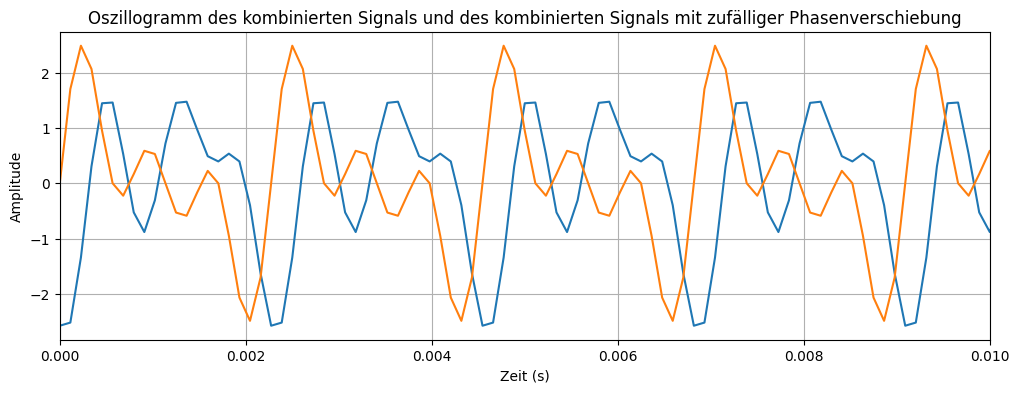

In [423]:
# Kombiniertes Signal mit zufälliger Phasenverschiebung erstellen
combined_signal_random_phase = kammerton_random_phase + second_harmonic_random_phase + third_harmonic_random_phase

# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('harmonisches_signal_random_phase.wav', fa, np.int16(combined_signal_random_phase * 32767))


# Audio-Datei abspielen
ipd.Audio('harmonisches_signal_random_phase.wav')

# Plot des Oszillogramms des kombinierten Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t_recording, combined_signal_random_phase)
plt.plot(t_recording, combined_signal)
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals und des kombinierten Signals mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [424]:
# Audio-Datei abspielen
ipd.Audio('harmonisches_signal.wav')

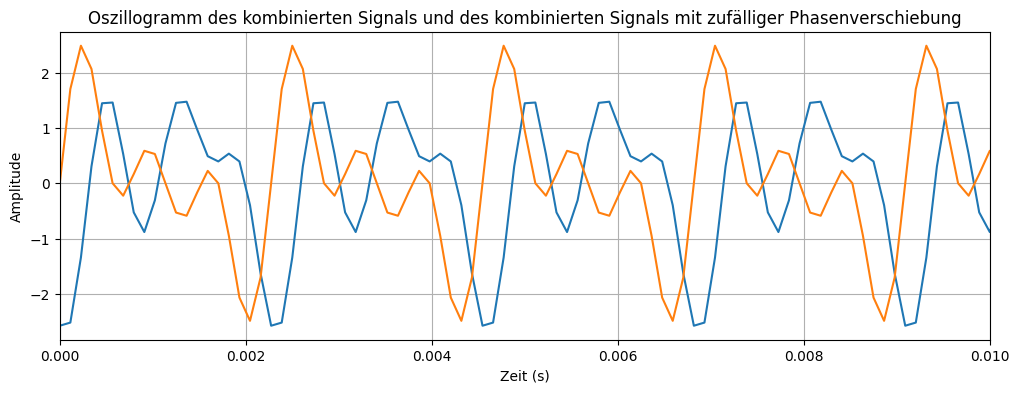

In [425]:
# Plot des Oszillogramms des kombinierten Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t_recording, combined_signal_random_phase)
plt.plot(t_recording, combined_signal)
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals und des kombinierten Signals mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Mit welchem Schallsignal können sie den Kammerton komplett auslöschen. 

- Generieren Sie in ihrem Programm das resultierende Signal und plotten und spielen Sie dieses ab.

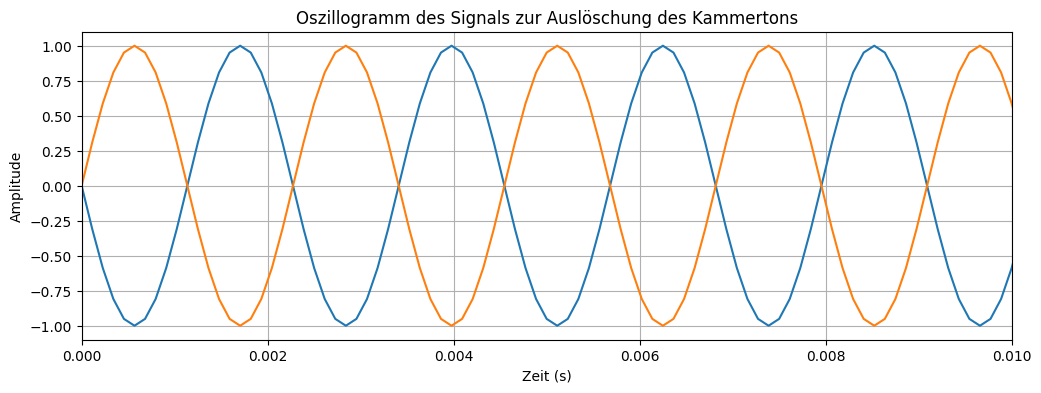

In [426]:
# Generierung des Signals zur Auslöschung des Kammertons
phase_shift = np.pi  # Phasenverschiebung um pi
canceling_signal = a * np.sin(2 * np.pi * f0 * t + phase_shift)

# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausloeschung.wav', fa, np.int16(canceling_signal * 32767))

# Plot des Oszillogramms des Signals zur Auslöschung des Kammertons
plt.figure(figsize=(12, 4))
plt.plot(t, canceling_signal)
plt.plot(t, kammerton)
plt.xlim(0,0.01)
plt.title('Oszillogramm des Signals zur Auslöschung des Kammertons')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('kammerton_ausloeschung.wav')

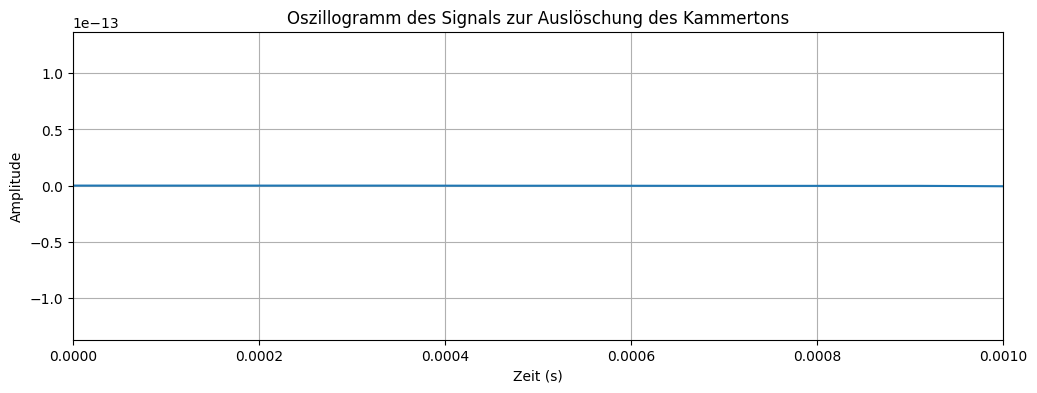

In [427]:
kammerton_canceling_signal = kammerton + canceling_signal 

# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausgeloescht.wav', fa, np.int16(kammerton_canceling_signal * 32767))

# Plot des Oszillogramms des Signals zur Auslöschung des Kammertons
plt.figure(figsize=(12, 4))
plt.plot(t, kammerton_canceling_signal)
plt.xlim(0,0.001)
plt.title('Oszillogramm des Signals zur Auslöschung des Kammertons')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
ipd.Audio('kammerton_ausgeloescht.wav')

## Erstellen Sie ein Programm zur Modellierung einer periodische Rechteckfunktion (f0 =1Hz, Breite=0.5s, fa =8kHz) durch Überlagerung aus seinen ersten 9 harmonischen Komponenten.  

- Plotten Sie die so erzeugte Rechteckfunktion und zusätzlich  die 1. Harmonische und die 9. Harmonische. 
- Erklären und beschreiben Sie den Zusammenhang zwischen den 3 Funktionen. 

In [ ]:
# Parameter
f0 = 1  # Grundfrequenz in Hz
width = 0.5  # Breite der Rechteckfunktion in Sekunden
fa = 8000  # Abtastfrequenz in Hz
num_harmonics = 9  # Anzahl der zu verwendenden harmonischen Komponenten

# Zeitvektor
t = np.linspace(0, width, int(width * fa), endpoint=False)

# Fourier-Reihe der Rechteckfunktion mit ungeraden Harmonischen
rectangular_wave = np.zeros_like(t)
for n in range(1, num_harmonics + 1, 2):
    rectangular_wave += (1 / n) * np.sin(2 * np.pi * n * f0 * t)
    
# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausloeschung.wav', fa, np.int16(rectangular_wave * 32767))

# Audio-Datei einlesen und abspielen
ipd.Audio('kammerton_ausloeschung.wav')